In [ ]:
pip  install jupyterlab  matplotlib==3.3.2 plotly==4.12.0 plotly-express==0.4.1 python-dotenv==0.15.0 nltk==3.5 numpy==1.19.2 pandas==1.1.3 regex==2020.10.23 scikit-learn==0.23.2 wordcloud==1.8.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px
import wordcloud
import nltk
import warnings
import re
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.rename(columns = {'v1':'class_label','v2':'message'},inplace=True)
df.head()

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
fig = px.histogram(df, x="class_label", color="class_label", color_discrete_sequence=["#871fff","#ffa78c"])
fig.show()

In [ ]:
fig = px.pie(df.class_label.value_counts(),labels='index', values='class_label', color="class_label", color_discrete_sequence=["#871fff","#ffa78c"] )
fig.show()

In [ ]:
df['length'] = df['message'].apply(len)
df.head()

,class_label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
fig = px.histogram(df, x="length", color="class_label", color_discrete_sequence=["#871fff","#ffa78c"] )
fig.show()

In [ ]:
df.head()

,class_label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
data_ham  = df[df['class_label'] == "ham"].copy()
data_spam = df[df['class_label'] == "spam"].copy()

def show_wordcloud(df, title):
    text = ' '.join(df['message'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords, background_color="#ffa78c",
                                        width = 3000, height = 2000).generate(text)
    plt.figure(figsize=(15,15), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

In [ ]:
df.head()

,class_label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


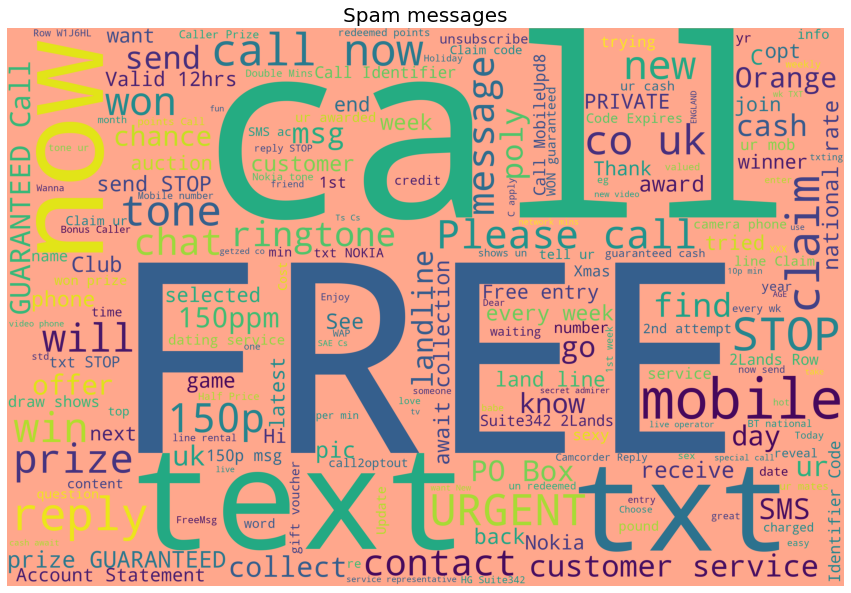

In [ ]:
show_wordcloud(data_spam, "Spam messages")

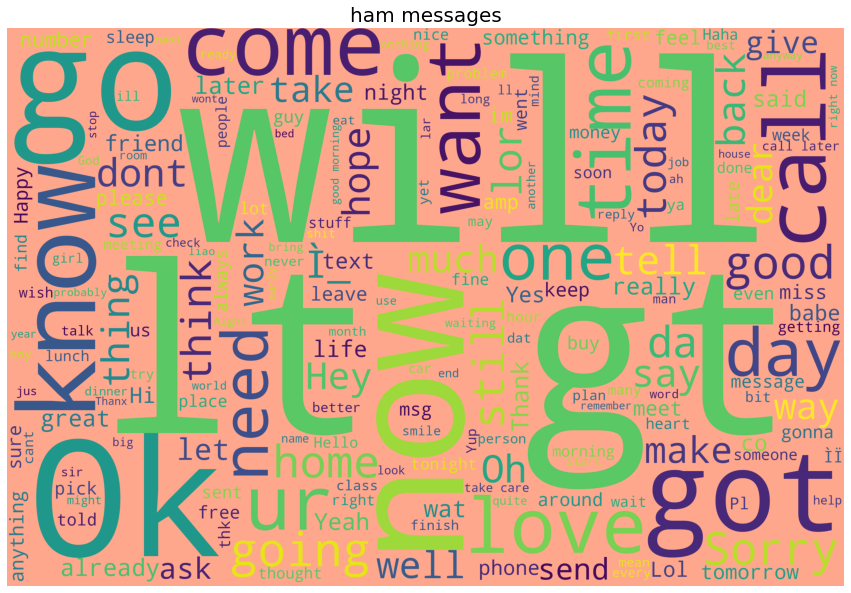

In [ ]:
show_wordcloud(data_ham, "ham messages")

In [ ]:
df['class_label'] = df['class_label'].map( {'spam': 1, 'ham': 0})

In [ ]:
df.isnull().sum()

class_label    0
message        0
length         0
dtype: int64

In [ ]:
from nltk.corpus import stopwords
import string

In [ ]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english")

def cleanText(messages):
    
    messages = messages.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in messages.split() if word.lower() not in stopwords.words("english")]
    
    return " ".join(words)

df["message"] = df["message"].apply(cleanText)
df.head(n = 10)    

,class_label,message,length
0,0,go jurong point crazi avail bugi n great world...,111
1,0,ok lar joke wif u oni,29
2,1,free entri 2 wkli comp win fa cup final tkts 2...,155
3,0,u dun say earli hor u c alreadi say,49
4,0,nah dont think goe usf live around though,61
5,1,freemsg hey darl 3 week word back id like fun ...,148
6,0,even brother like speak treat like aid patent,77
7,0,per request mell mell oru minnaminungint nurun...,160
8,1,winner valu network custom select receivea å£9...,158
9,1,mobil 11 month u r entitl updat latest colour ...,154


In [ ]:
import nltk
nltk.download('punkt')
  
sms_df = df['message']
from nltk.tokenize import word_tokenize

# creating a bag-of-words model
all_words = []
for sms in sms_df:
    words = word_tokenize(sms)
    for w in words:
        all_words.append(w)
     
all_words = nltk.FreqDist(all_words)     

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print('Number of words: {}'.format(len(all_words)))


Number of words: 8093


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class_label  5572 non-null   int64 
 1   message      5572 non-null   object
 2   length       5572 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 130.7+ KB


In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split  (df['message'],df['class_label'], test_size = 0.3, random_state = 0, shuffle = True)  
# vectorizer training 
from sklearn.pipeline import Pipeline 
from sklearn.svm import SVC 
from sklearn.feature_extraction.text import TfidfVectorizer 
SVCclassifier = Pipeline([("tfidf",TfidfVectorizer()),("classifier",SVC(kernel='rbf',random_state=0))])  
SVCclassifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(random_state=0))])

In [ ]:
test1=x_test
print(SVCclassifier.predict(test1))

[0 0 0 ... 0 0 0]


In [ ]:
test2=["WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]
print(SVCclassifier.predict(test2))


[1]


In [ ]:
test1=["Had your mobile 11mths ? Update for FREE to Oranges latest colour camera mobiles & unlimited weekend calls. Call Mobile Upd8 on freefone 08000839402 or 2StopTxt"]
print(SVCclassifier.predict(test1))

[0]


In [ ]:

test2=["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."]
print(SVCclassifier.predict(test2))

[0]


In [ ]:
X=df['message']
y=df['class_label']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

def classify(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    
#     cv_score = cross_val_score(model, X, y, cv=5)
#     print("CV Score:", np.mean(cv_score)*100)
    y_pred = pipeline_model.predict(x_test)
    print(classification_report(y_test, y_pred))

In [ ]:
test1=["Had your mobile 11mths ? Update for FREE to Oranges latest colour camera mobiles & unlimited weekend calls. Call Mobile Upd8 on freefone 08000839402 or 2StopTxt"]
print(SVCclassifier.predict(test1))

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy: 96.12347451543431
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1206
           1       0.99      0.72      0.83       187

    accuracy                           0.96      1393
   macro avg       0.98      0.86      0.91      1393
weighted avg       0.96      0.96      0.96      1393



In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model, X, y)

Accuracy: 96.05168700646087
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1206
           1       0.99      0.71      0.83       187

    accuracy                           0.96      1393
   macro avg       0.97      0.86      0.90      1393
weighted avg       0.96      0.96      0.96      1393



In [ ]:
from sklearn.svm import SVC
model = SVC(C=3)
classify(model, X, y)

Accuracy: 98.42067480258436
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1206
           1       1.00      0.88      0.94       187

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy: 96.98492462311557
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1206
           1       1.00      0.78      0.87       187

    accuracy                           0.97      1393
   macro avg       0.98      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393

